## Exploratory Data Analysis 

### 1. Data Exploration and Cleaning

    - This section looks at statiscal summaries and distribution, check for missing values, duplicates and outliers. 
    - The purpose of this step is to understand the data at high level, identify any dirty data that requires cleaning. 
    
### 2. Data Cleaning
    
    - This section carries out the data cleaning steps discovered in the previous section.
    - The purpose of this step has two objective:
          1. To prepare the data for machine learning training.
          2. To prepare the data for bivariate analysis.

### 3. Bivariate Analysis
#### 3.1 Temperature vs Features
     - This section examines the relationship between temperature (target) and various features using a correlation matrix.
       and visualizations. 
     - The purpose is to find any insights through the relationship and provide recommendation to AgroTech Innovations 
       (if any).
     - Also to see if feature engineering is required.

#### 3.2 Plant Type-Stage vs Features
     - This section examines the relationship between Plant Type-Stage (target) and various features using visualizations. 
     - The purpose is to find any insights through the relationship and provide recommendation to AgroTech Innovations 
       (if any).
     - Also to see if feature engineering is required.
     
#### 3.3 Recommendation
    - Provide recommendation to improve the operational efficiency of AgroTech Innovations based on the findings from 
      bivariate analysis.

### 4. Feature Selection for Machine Learning
    - To list out the target and feature variables for training the two models respectively.


In [89]:
#import relevant packages
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = "{:,.2f}".format

In [90]:
#connect to the SQLite database
conn = sqlite3.connect('./data/agri.db')
cursor = conn.cursor()

#execute a query to get all table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

#fetch all results
tables = cursor.fetchall()

#print the table names
print(tables[0][0])

farm_data


In [91]:
# Execute an SQL query to fetch data from the table
query = f"SELECT * FROM {tables[0][0]}" 
#load query into dataframe
df = pd.read_sql_query(query,conn)

## 1. Data Exploratory

In [92]:
#show the first 5 rows of the dataframe (dataset)
df.head()

System Location Code Previous Cycle Plant Type           Plant Type  \
0               Zone_D                     Herbs           Vine Crops   
1               Zone_G                     Herbs           VINE CROPS   
2               Zone_F                     Herbs                herbs   
3               Zone_G                     Herbs  fruiting vegetables   
4               Zone_B                Vine Crops         LEAFY GREENS   

  Plant Stage  Temperature Sensor (°C)  Humidity Sensor (%)  \
0    Maturity                    23.34                  NaN   
1  Vegetative                   -24.16                63.14   
2    maturity                    23.84                  NaN   
3  Vegetative                    22.61                  NaN   
4    seedling                    22.88                  NaN   

   Light Intensity Sensor (lux)  CO2 Sensor (ppm)  EC Sensor (dS/m)  \
0                        454.00               937              1.82   
1                        441.00               938              2.13   
2                        562.00              1246              1.21   
3                        651.00              1346              1.96   
4                        144.00               812              2.76   

   O2 Sensor (ppm) Nutrient N Sensor (ppm) Nutrient P Sensor (ppm)  \
0                4                     161                      64   
1                6                     161                      53   
2                8                     228                      79   
3                6                    None                  53 ppm   
4                5                      61                      19   

  Nutrient K Sensor (ppm)  pH Sensor  Water Level Sensor (mm)  
0                     201       6.10                    28.15  
1                    None       6.50                    31.00  
2                     292       6.40                    26.00  
3                     289       6.60                      NaN  
4                     168       5.50                    28.00

### 1.1. Sumarize Information About The Data

In [93]:
#check the shape of the dataset, data type of each attributes and whether if there is any null values

'''
observation

The dataset has 15 columns, 57489 rows. Among the 15 columns, its datatypes are 6 float64, 2 int64 and 7 objects.

Based on the attribute description Nutrient (N,P,K) sensors have the same unit measurement as O2 and CO2 sensor, parts per 
million (ppm). However Nutrient (N,P,K) sensor data type are classified as object. A quick reference using df.head() shows 
that the values in the these values have a combination of integer and string values (unit measurment ppm).

There are 7 attributes with null values based on the Non-null Count.
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57489 entries, 0 to 57488
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   System Location Code          57489 non-null  object 
 1   Previous Cycle Plant Type     57489 non-null  object 
 2   Plant Type                    57489 non-null  object 
 3   Plant Stage                   57489 non-null  object 
 4   Temperature Sensor (°C)       48800 non-null  float64
 5   Humidity Sensor (%)           18622 non-null  float64
 6   Light Intensity Sensor (lux)  53211 non-null  float64
 7   CO2 Sensor (ppm)              57489 non-null  int64  
 8   EC Sensor (dS/m)              57489 non-null  float64
 9   O2 Sensor (ppm)               57489 non-null  int64  
 10  Nutrient N Sensor (ppm)       47515 non-null  object 
 11  Nutrient P Sensor (ppm)       51791 non-null  object 
 12  Nutrient K Sensor (ppm)       53788 non-null  object 
 13  p

### 1.2 Check Null Values

In [94]:
'''
Humidity Sensor (%) has the 67.6% data missing, suggesting it is not a good feature for machine learning.
'''
#shows the percentage of null values against the dataset
df.isna().sum() / df.shape[0] * 100

System Location Code            0.00
Previous Cycle Plant Type       0.00
Plant Type                      0.00
Plant Stage                     0.00
Temperature Sensor (°C)        15.11
Humidity Sensor (%)            67.61
Light Intensity Sensor (lux)    7.44
CO2 Sensor (ppm)                0.00
EC Sensor (dS/m)                0.00
O2 Sensor (ppm)                 0.00
Nutrient N Sensor (ppm)        17.35
Nutrient P Sensor (ppm)         9.91
Nutrient K Sensor (ppm)         6.44
pH Sensor                       0.00
Water Level Sensor (mm)        15.03
dtype: float64

In [95]:
'''
Name of the 7 attributes with null values. Will look deeper into these attributes to see how to process null values, whether 
to drop the null values or impute with an aggregation.
'''
#isna functions shows that there are 7 attributes with null values.
def isna(col):
    
    return True in df[col].isna().value_counts().index

columns_with_na = list(filter(isna, df.columns))
columns_with_na

['Temperature Sensor (°C)',
 'Humidity Sensor (%)',
 'Light Intensity Sensor (lux)',
 'Nutrient N Sensor (ppm)',
 'Nutrient P Sensor (ppm)',
 'Nutrient K Sensor (ppm)',
 'Water Level Sensor (mm)']

In [96]:
'''
observation:
Temperature, Light Intensity and EC have negative values which does not make sense as measurement of temperature,conductivity 
and light intensity cannot be negative. This suggest removal of negative values is required

The range of each attributes vary from ones to hundreds.
'''
#look at summary statistic of the numberical data
df.describe()

Temperature Sensor (°C)  Humidity Sensor (%)  \
count                48,800.00            18,622.00   
mean                     22.14                69.24   
std                       7.56                 5.73   
min                     -28.57                59.22   
25%                      22.14                64.34   
50%                      23.21                68.70   
75%                      24.35                74.12   
max                      28.75                81.14   

       Light Intensity Sensor (lux)  CO2 Sensor (ppm)  EC Sensor (dS/m)  \
count                     53,211.00         57,489.00         57,489.00   
mean                         397.84          1,083.38              1.62   
std                          222.92            172.57              0.42   
min                         -799.00            799.00             -0.25   
25%                          257.00            950.00              1.36   
50%                          403.00          1,071.00              1.65   
75%                          553.00          1,178.00              1.90   
max                          800.00          1,500.00              3.44   

       O2 Sensor (ppm)  pH Sensor  Water Level Sensor (mm)  
count        57,489.00  57,489.00                48,847.00  
mean              6.58       6.02                    25.72  
std               1.15       0.40                     5.82  
min               3.00       3.80                    10.00  
25%               6.00       5.80                    21.31  
50%               7.00       6.00                    26.00  
75%               7.00       6.30                    30.00  
max              11.00       7.80                    40.00

### 1.3 Check Duplicated Values

In [97]:
'''
There are 7489 duplicated values. Need to remove them.
'''
#check for duplicated values
df.duplicated().value_counts()

False    50000
True      7489
dtype: int64

### 1.4 Check Distribution of Categorical Attributes

In [98]:
#looking at count distribution of categorical attributes    
'''
observation:

Attribute System Location Code, Previous Cycle Plan Type have almost equal distribution of values, suggesting that these 
attributes might not be useful for machine learning.

There are some inconsistencies in Plant Type & Plant Stage attributes, the same categories appear with different 
capitalization. Need to process the values to standardize the capitalization.

Unit measurement are added as part of the value in Nutrient N, P, K Sensor (ppm)

'''

#store attributes with object dtype as a list
categorical_cols = df.select_dtypes(include=['object'])

#using a for loop to print out the possible non-null values of each object type attributes
for col in categorical_cols:
    print(f'{col}:')
    print(df[col].value_counts())
    print('\n')


System Location Code:
Zone_B    8296
Zone_G    8287
Zone_E    8272
Zone_C    8268
Zone_F    8156
Zone_A    8148
Zone_D    8062
Name: System Location Code, dtype: int64


Previous Cycle Plant Type:
Fruiting Vegetables    14481
Leafy Greens           14446
Vine Crops             14305
Herbs                  14257
Name: Previous Cycle Plant Type, dtype: int64


Plant Type:
Fruiting Vegetables    10137
Herbs                  10059
Leafy Greens            9968
Vine Crops              9921
leafy greens            2241
HERBS                   2239
LEAFY GREENS            2183
VINE CROPS              2173
vine crops              2163
FRUITING VEGETABLES     2154
fruiting vegetables     2128
herbs                   2123
Name: Plant Type, dtype: int64


Plant Stage:
Seedling      13440
Vegetative    13364
Maturity      13330
SEEDLING       3048
seedling       2937
maturity       2899
VEGETATIVE     2889
vegetative     2809
MATURITY       2773
Name: Plant Stage, dtype: int64


Nutrient N Sensor (

### 1.5 Check Outlier

Outliers in Temperature Sensor (°C):
Number of outliers: 1575
Percentage of outliers: 2.74%
Lower bound: 18.82, Upper bound: 27.67


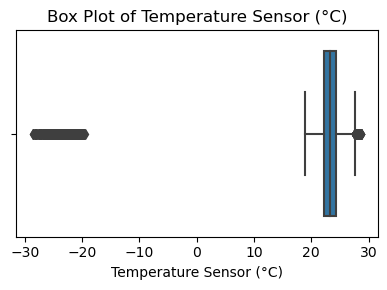

Outliers in Humidity Sensor (%):
Number of outliers: 0
Percentage of outliers: 0.00%
Lower bound: 49.67, Upper bound: 88.78


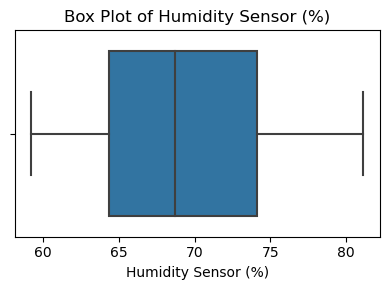

Outliers in Light Intensity Sensor (lux):
Number of outliers: 1279
Percentage of outliers: 2.22%
Lower bound: -187.00, Upper bound: 997.00


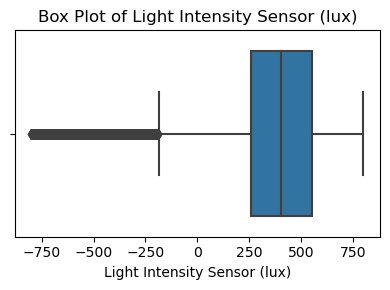

Outliers in CO2 Sensor (ppm):
Number of outliers: 0
Percentage of outliers: 0.00%
Lower bound: 608.00, Upper bound: 1520.00


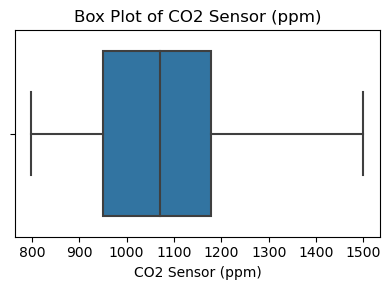

Outliers in EC Sensor (dS/m):
Number of outliers: 870
Percentage of outliers: 1.51%
Lower bound: 0.55, Upper bound: 2.71


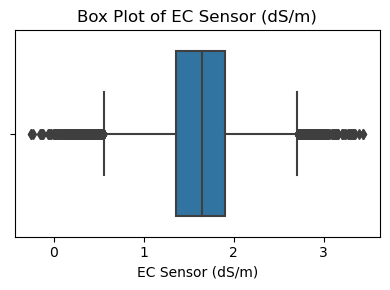

Outliers in O2 Sensor (ppm):
Number of outliers: 4489
Percentage of outliers: 7.81%
Lower bound: 4.50, Upper bound: 8.50


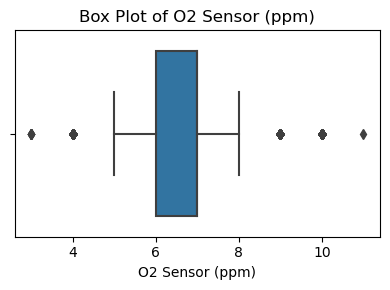

Outliers in pH Sensor:
Number of outliers: 1009
Percentage of outliers: 1.76%
Lower bound: 5.05, Upper bound: 7.05


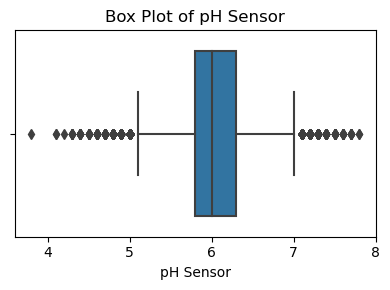

Outliers in Water Level Sensor (mm):
Number of outliers: 0
Percentage of outliers: 0.00%
Lower bound: 8.28, Upper bound: 43.03


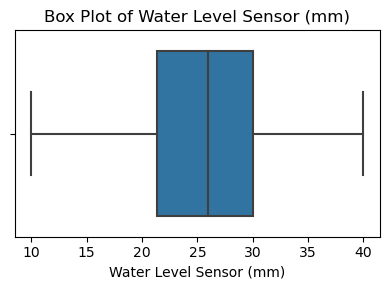

In [99]:
'''
observation:
Out of the 10 numerical attributes, 5 have no outlier.
For attributes with outlier, 4 out of with outlier have less than 2% of outlier. 
While one (O2 Sensor) has 7.89% outlier. 
It might be of interest to AgroTech Innovation to investigate the O2 concentration to enchance its operational efficiency.

'''
# Select numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

#define an empty list to store attributes with outlier. This list will be use to clean outlier.
outlier_cols = []

def plot_boxplot(df, column):
    #get 1st & 3rd quantile of the attributes
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    #intequantile range
    IQR = Q3 - Q1
    #define the lower and upper limits of acceptable range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    #get the dataframe which the attribute has outlier
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"Outliers in {column}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {len(outliers) / len(df) * 100:.2f}%")
    print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    
    # Create box plots before and after removing outliers
    plt.figure(figsize=(4, 3))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')

    plt.tight_layout()
    plt.show()
    
    #if attribute has outliers return the name of the attribute
    if len(outliers) > 0 :
        return column
    
for column in numeric_cols:
    outlier_col = plot_boxplot(df, column)
    if outlier_col is not None:
        outlier_cols.append(outlier_col)

### 1.6 Summary of Data Exploration

**Observation:**
 1. Nutrient (N,P,K) sensors have combination of values consist of numbers (i.e 200) and numbers with unit measurement (i.e.178 ppm).
 2. There are 7 attributes with null values. Of which Humidity Sensor has two-third of its data missing
 3. There are 3 attributes with negative values which are not suspose to.
 4. Plant Type & Plant Stage attributes have values with different captitalization.
 5. There are 7489 duplicated rows
   
   
The above observations can be translated into cleaning steps:

**To Do:**

- TODO1: Drop Humidity Sensor as it has alot (67.6%) of missing data
- TODO2: Remove duplicated rows
- TODO3: Remove the unit of measurement (ppm) from the values in Nutrient (N,P,K) sensors attributes and convert them to float data type
- TODO4: Remove the negative values from the 3 attributes
- TODO5: Standardize the capitalization of Plant Type & Plant Stage attributes
- TODO6: Remove null values from the 7 attributes or impute them with mean or median
- TODO7: Remove outliers



## 2. Data Cleaning

### 2.1. Drop Humidity Sensor 

In [100]:
#TODO1: Drop Humidity Sensor
df.drop(columns=['Humidity Sensor (%)'], inplace = True)

### 2.2. Remove duplicated rows

In [101]:
#TODO2: Remove duplicated rows
df.drop_duplicates(inplace=True)

### 2.3. Remove Units from Nurtient (N, P, K) Sensor Attributes 

In [102]:
#TODO3: Remove the unit of measurement (ppm) from the values in Nutrient (N,P,K) sensors attributes

#get Nutrients N, P, K attributes and store them in a list
nutrient_cols = list(filter(lambda col : 'Nutrient' in col, df.columns))

#using a for loop to loop through each column and apply a lambda function.
for col in nutrient_cols:
    #for each value, if the value is None, return null value, else do a split and return only the first elements of the list.
    df[col] = df[col].apply(lambda x : np.nan if x is None else x.split(' ')[0])
    #convert the data type to float, this is needed to plot histogram
    df[col] = df[col].astype('float64')

### 2.4. Remove the Negative Values from Temperature, Light Intensity and EC Sensors

In [103]:
#TODO4: Remove the negative values from the 3 attributes
def isneg(col):
    
    return df[col].min() < 0

#using filter function to identify the target attributes and store them in a list
columns_with_neg = list(filter(isneg, df.describe().columns))

#get rows with negative values in one of the temperature, light intensity and EC sensors
rows_with_neg_val = df[(df[columns_with_neg] < 0 ).any(axis=1)].index
df.drop(rows_with_neg_val, inplace=True)

### 2.5. Standardize the Capitalization of Plant Type & Plant Stage attributes

In [104]:
#TODO5: Standardize the capitalization of Plant Type & Plant Stage attributes
#change to title case using lambda
df['Plant Stage'] = df['Plant Stage'].apply(lambda x : x.title())
df['Plant Type'] = df['Plant Type'].apply(lambda x : x.title())

### 2.6a. Handling Null Values

In [105]:
#TODO6: Remove null values from the 7 attributes or impute them with mean or median
'''
If I remove the entire records with null values, half of the dataset is lost. 
filling null values with average or median is more logical step.

'''

data_lost_pct = round((1 - df.dropna().shape[0]/df.shape[0]) * 100, 1)
print(f'{data_lost_pct}% of the data is lost if all null values are removed')

53.9% of the data is lost if all null values are removed


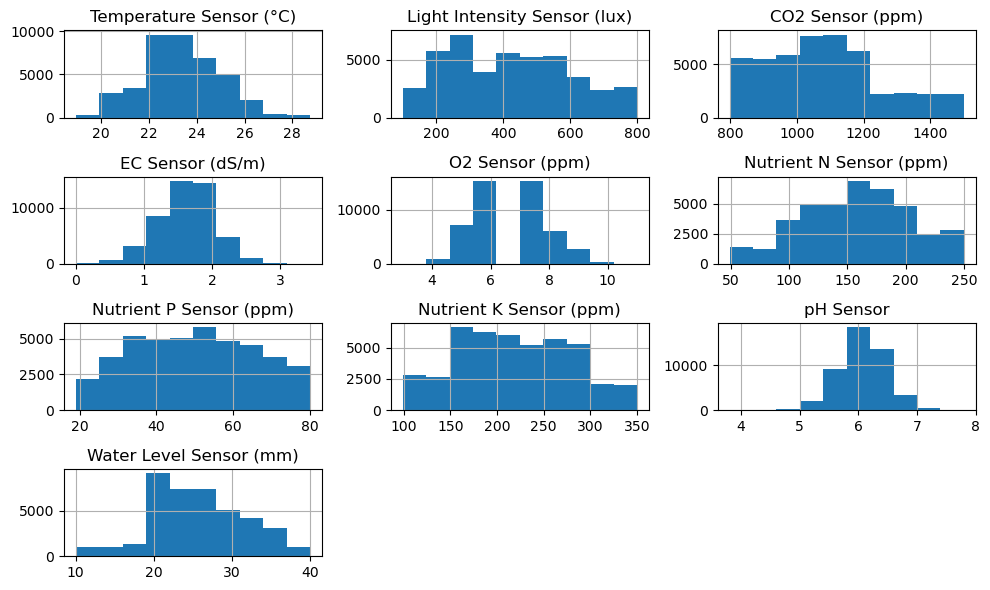

Temperature Sensor (°C)  Light Intensity Sensor (lux)  \
count                40,350.00                     44,134.00   
mean                     23.33                        420.08   
std                       1.62                        178.50   
min                      18.93                         99.00   
25%                      22.23                        266.00   
50%                      23.26                        411.00   
75%                      24.39                        557.00   
max                      28.75                        800.00   

       CO2 Sensor (ppm)  EC Sensor (dS/m)  O2 Sensor (ppm)  \
count         47,762.00         47,762.00        47,762.00   
mean           1,083.28              1.63             6.58   
std              172.61              0.41             1.15   
min              799.00              0.00             3.00   
25%              950.00              1.36             6.00   
50%            1,071.00              1.65             7.00   
75%            1,178.00              1.90             7.00   
max            1,500.00              3.44            11.00   

       Nutrient N Sensor (ppm)  Nutrient P Sensor (ppm)  \
count                39,458.00                43,018.00   
mean                    157.84                    49.88   
std                      45.67                    15.41   
min                      49.00                    19.00   
25%                     124.00                    37.00   
50%                     158.00                    50.00   
75%                     190.00                    62.00   
max                     250.00                    80.00   

       Nutrient K Sensor (ppm)  pH Sensor  Water Level Sensor (mm)  
count                44,682.00  47,762.00                40,585.00  
mean                    218.11       6.02                    25.72  
std                      60.75       0.40                     5.83  
min                      99.00       3.80                    10.00  
25%                     170.00       5.80                    21.32  
50%                     215.00       6.00                    26.00  
75%                     266.00       6.30                    30.00  
max                     350.00       7.80                    40.00

In [106]:

'''
based on the output, it seems like Nurtirent (N, P, K) are quite normally distributed.
the median and average are very close. i will use average to impute the null values for these 3 Nutrient (N,P,K) attributes.

'''
# Plot histograms and df.describe to see the statiscal summary
numerical_cols = df[df.describe().columns]
numerical_cols.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

df.describe()

### 2.6b. Impute Null Values

In [107]:
#using for loop to impute mean to missing values of each Nurtient attribute
for col in nutrient_cols:

    # Calculate the mean of the column, ignoring NaN values
    column_mean = df[col].mean()
    # Impute missing values with mean
    df[col].fillna(column_mean, inplace=True)
    
for col in ['Temperature Sensor (°C)', 'Light Intensity Sensor (lux)','Water Level Sensor (mm)']:
    # Calculate the median of the column, ignoring NaN values
    column_median = df[col].median()
    # Impute missing values with median
    df[col].fillna(column_median, inplace=True)

In [108]:
# Plot histograms
df.isna().any()

System Location Code            False
Previous Cycle Plant Type       False
Plant Type                      False
Plant Stage                     False
Temperature Sensor (°C)         False
Light Intensity Sensor (lux)    False
CO2 Sensor (ppm)                False
EC Sensor (dS/m)                False
O2 Sensor (ppm)                 False
Nutrient N Sensor (ppm)         False
Nutrient P Sensor (ppm)         False
Nutrient K Sensor (ppm)         False
pH Sensor                       False
Water Level Sensor (mm)         False
dtype: bool

### 2.7. Remove Outliers

Outliers in Temperature Sensor (°C):
Number of outliers: 1147
Percentage of outliers: 2.40%
Lower bound: 19.950000000000003, Upper bound: 26.590000000000003


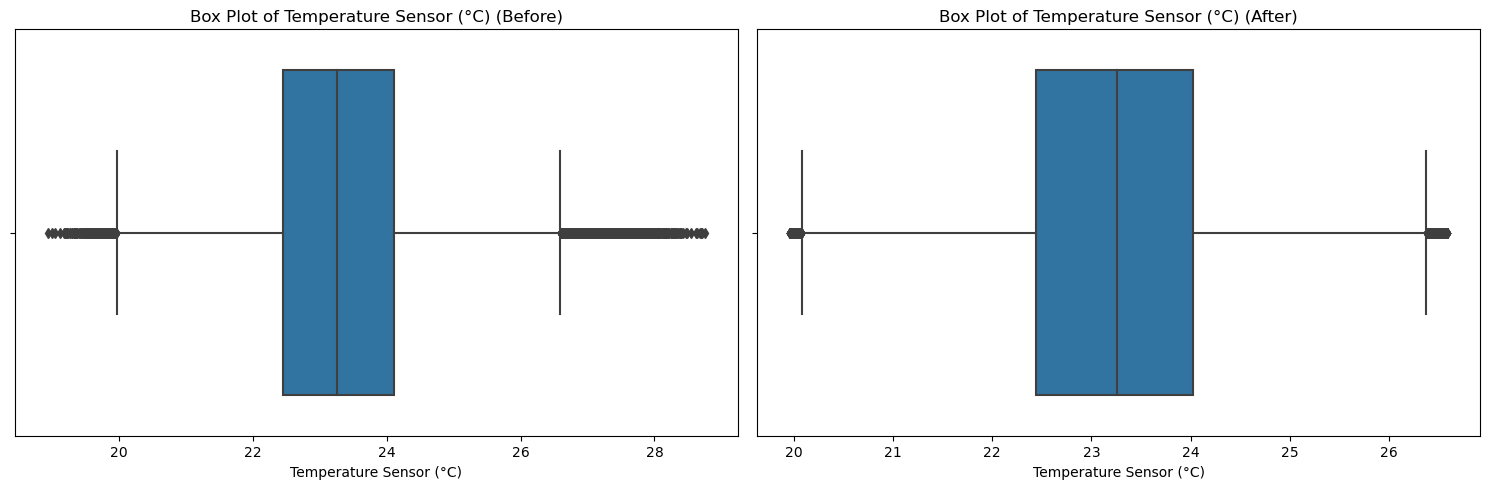

Shape before removing outliers: (47762, 14)
Shape after removing outliers: (46615, 14)


Outliers in Light Intensity Sensor (lux):
Number of outliers: 0
Percentage of outliers: 0.00%
Lower bound: -124.5, Upper bound: 935.5


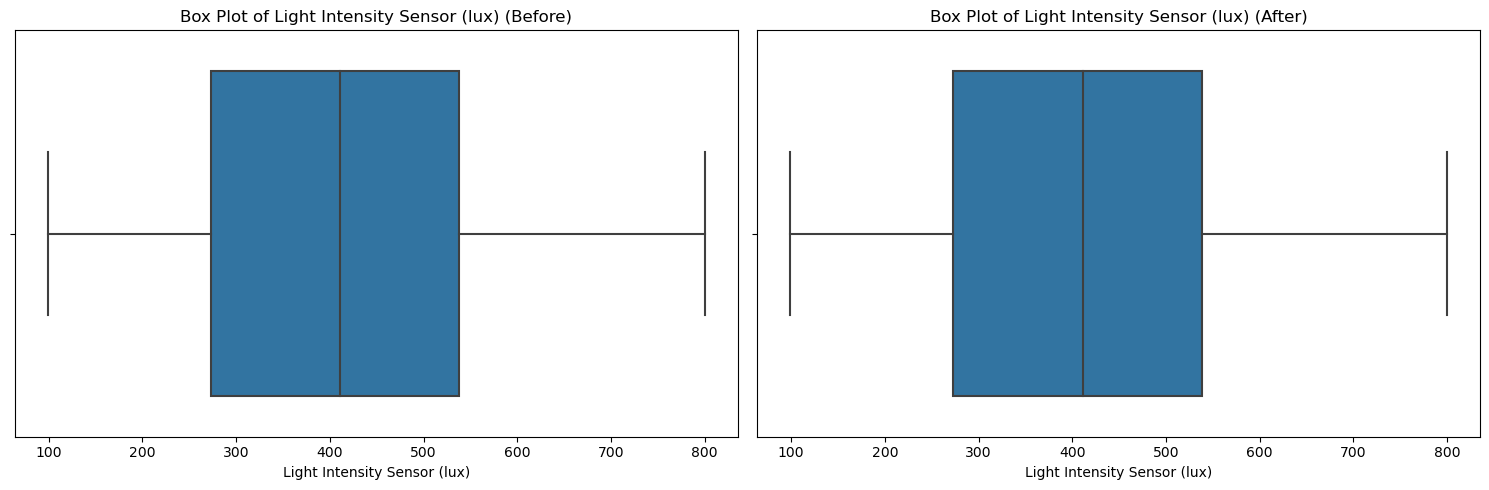

Shape before removing outliers: (46615, 14)
Shape after removing outliers: (46615, 14)


Outliers in CO2 Sensor (ppm):
Number of outliers: 0
Percentage of outliers: 0.00%
Lower bound: 606.0, Upper bound: 1518.0


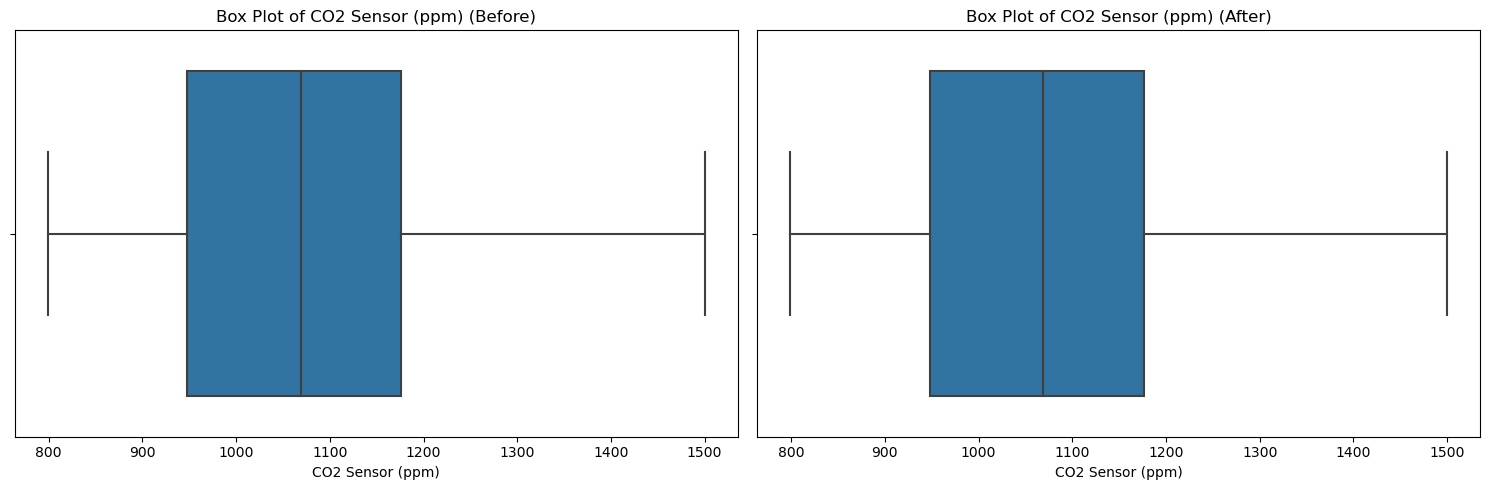

Shape before removing outliers: (46615, 14)
Shape after removing outliers: (46615, 14)


Outliers in EC Sensor (dS/m):
Number of outliers: 680
Percentage of outliers: 1.46%
Lower bound: 0.5500000000000004, Upper bound: 2.7099999999999995


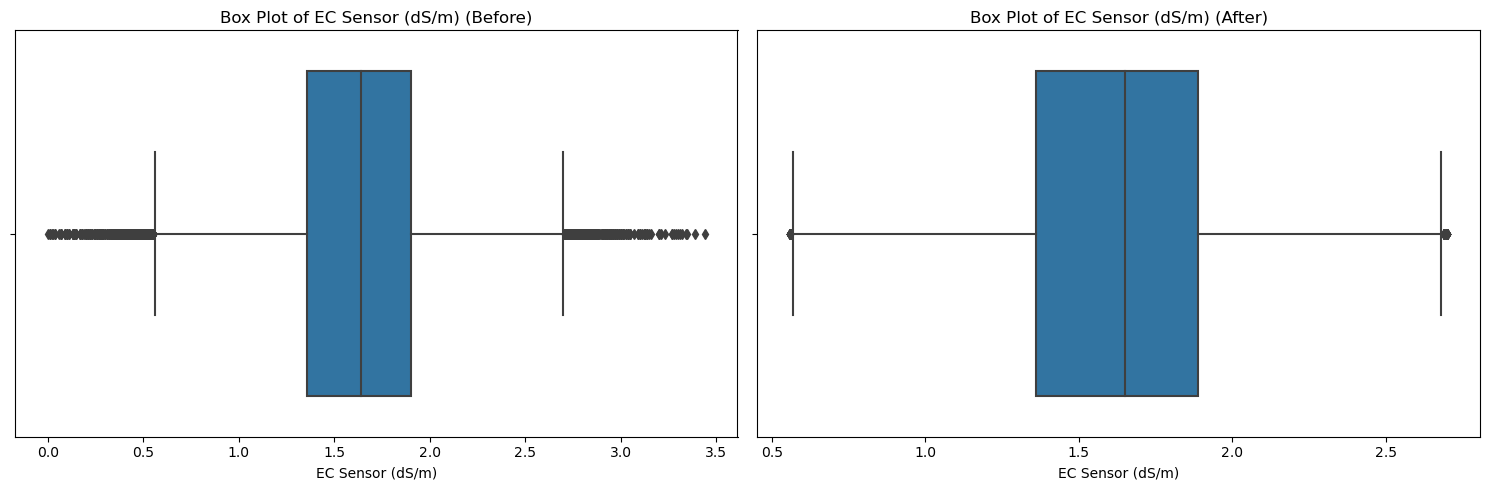

Shape before removing outliers: (46615, 14)
Shape after removing outliers: (45935, 14)


Outliers in O2 Sensor (ppm):
Number of outliers: 3462
Percentage of outliers: 7.54%
Lower bound: 4.5, Upper bound: 8.5


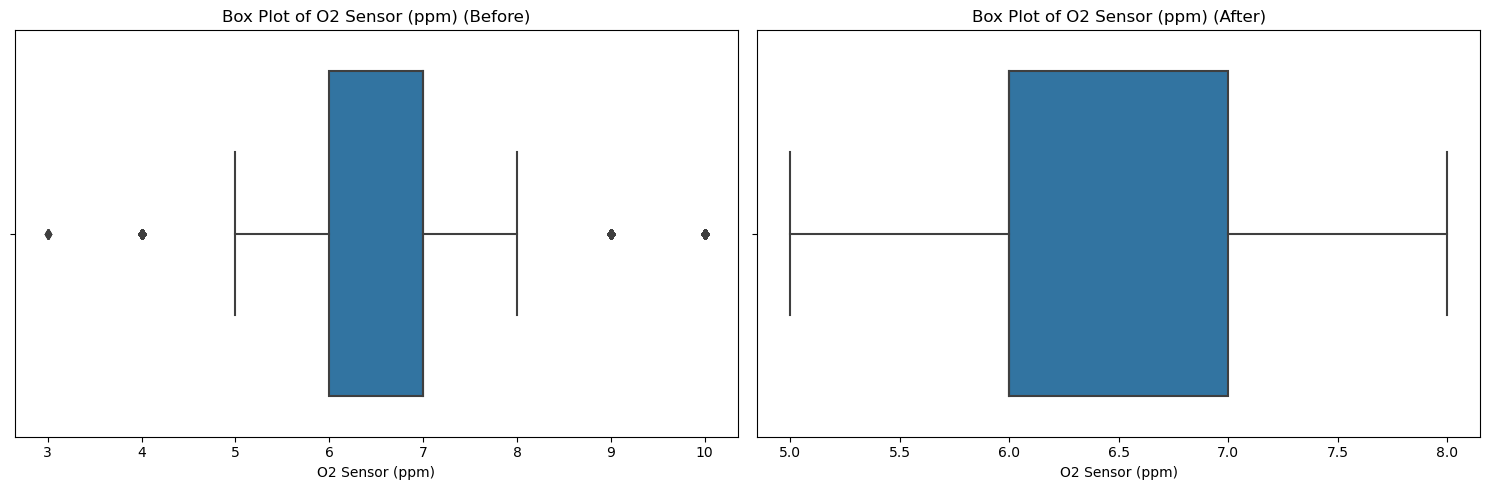

Shape before removing outliers: (45935, 14)
Shape after removing outliers: (42473, 14)


Outliers in Nutrient N Sensor (ppm):
Number of outliers: 214
Percentage of outliers: 0.50%
Lower bound: 52.0, Upper bound: 260.0


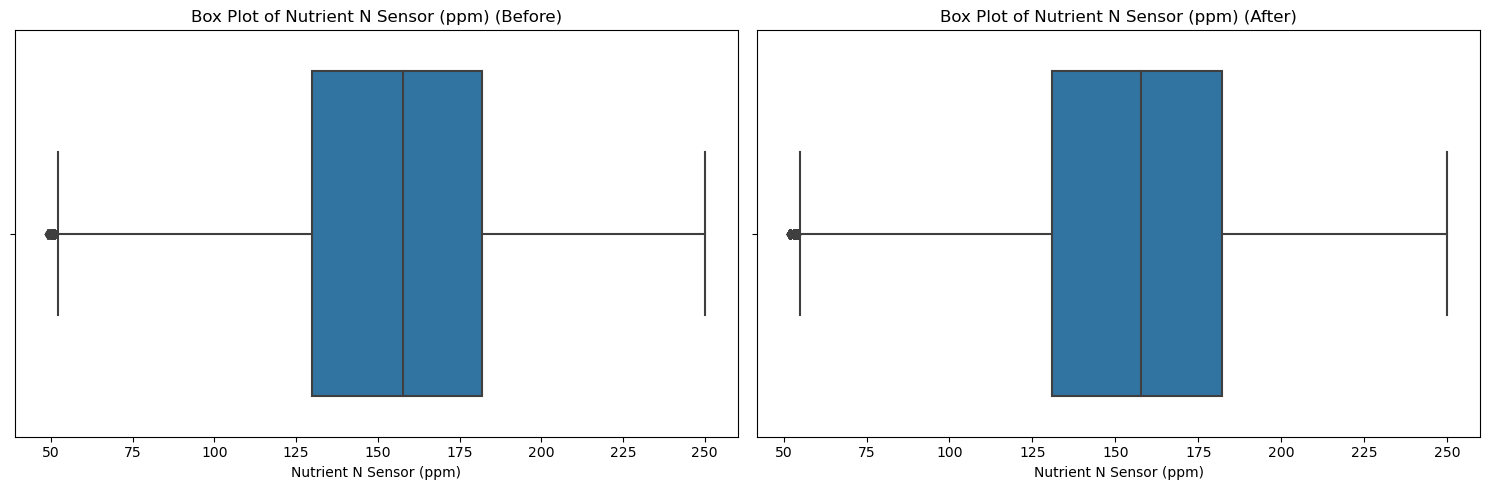

Shape before removing outliers: (42473, 14)
Shape after removing outliers: (42259, 14)


Outliers in Nutrient P Sensor (ppm):
Number of outliers: 0
Percentage of outliers: 0.00%
Lower bound: 5.0, Upper bound: 93.0


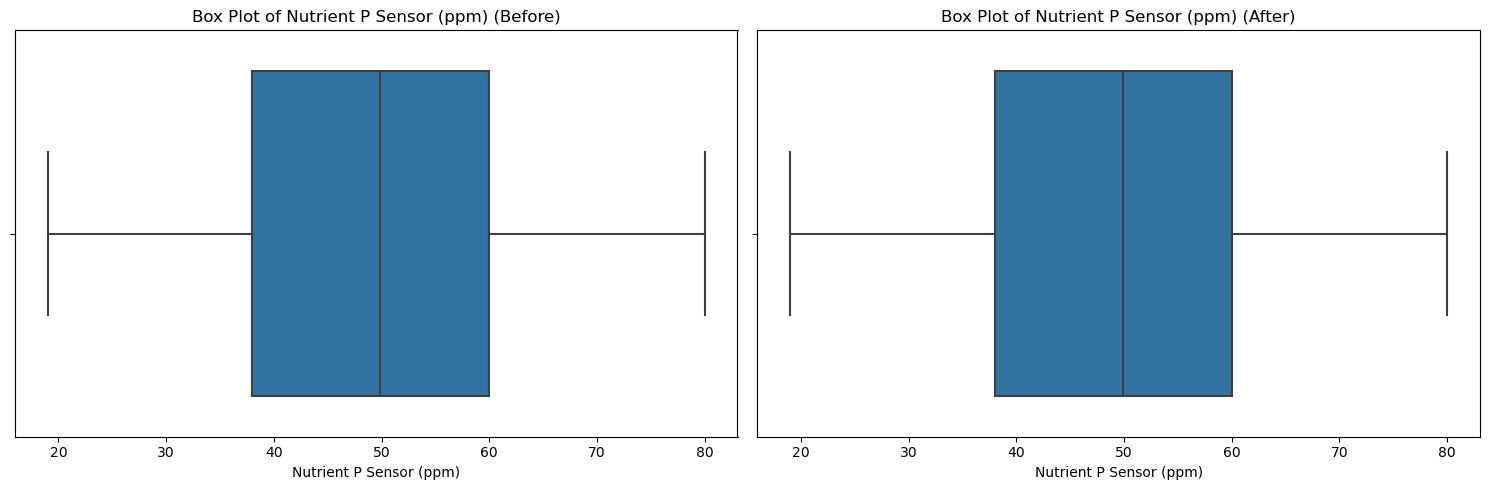

Shape before removing outliers: (42259, 14)
Shape after removing outliers: (42259, 14)


Outliers in Nutrient K Sensor (ppm):
Number of outliers: 0
Percentage of outliers: 0.00%
Lower bound: 34.5, Upper bound: 398.5


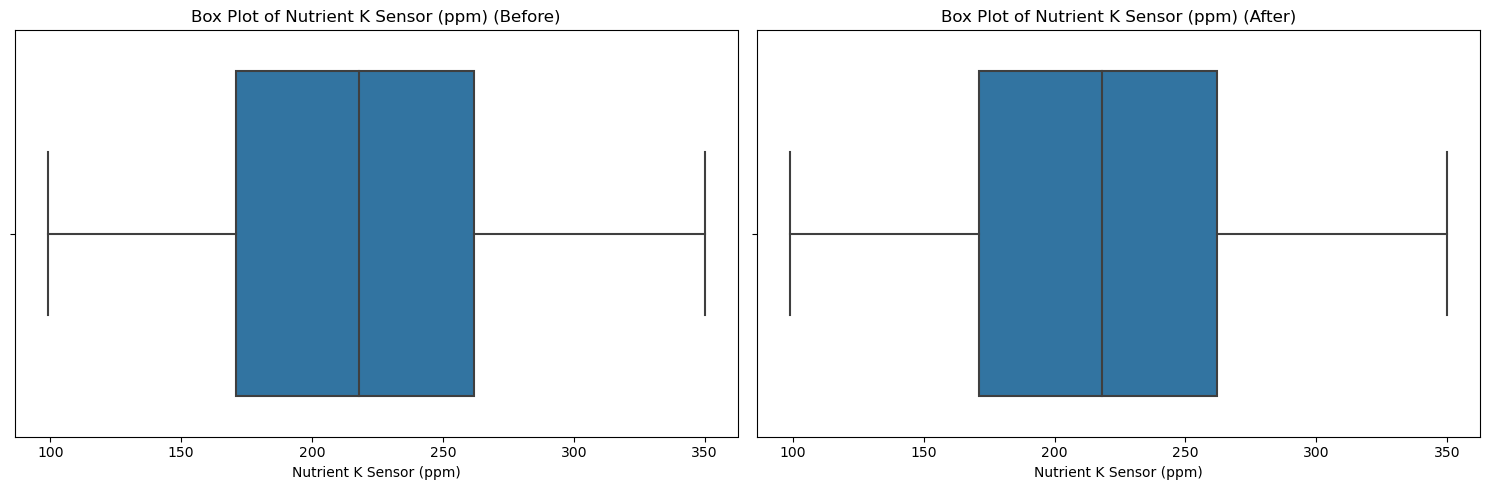

Shape before removing outliers: (42259, 14)
Shape after removing outliers: (42259, 14)


Outliers in pH Sensor:
Number of outliers: 734
Percentage of outliers: 1.74%
Lower bound: 5.05, Upper bound: 7.05


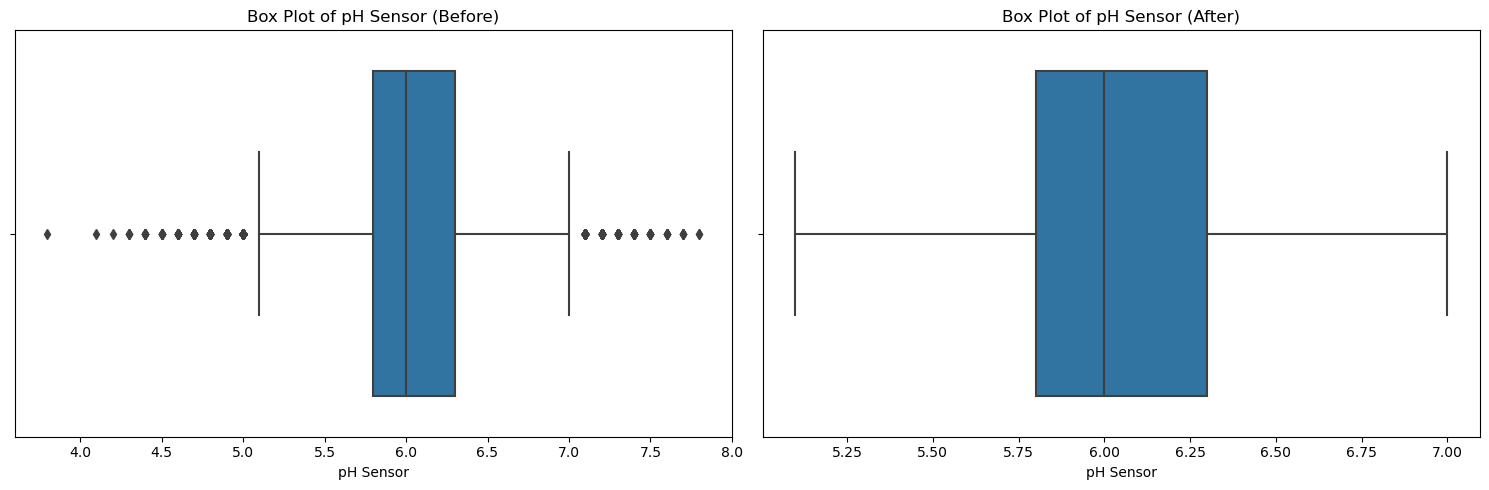

Shape before removing outliers: (42259, 14)
Shape after removing outliers: (41525, 14)


Outliers in Water Level Sensor (mm):
Number of outliers: 549
Percentage of outliers: 1.32%
Lower bound: 11.5, Upper bound: 39.5


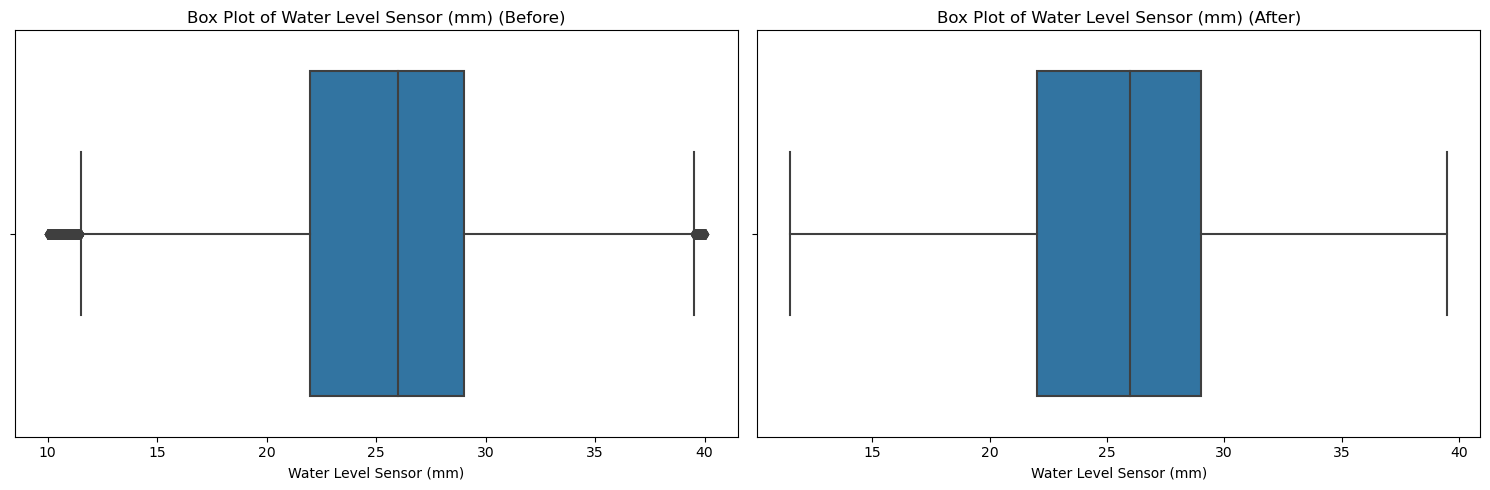

Shape before removing outliers: (41525, 14)
Shape after removing outliers: (40976, 14)


Final shape of the DataFrame after removing outliers from all columns: (40976, 14)


In [109]:
def check_and_remove_outliers(df, column, plot=True):
    #get 1st & 3rd quantile of the attributes
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    #intequantile range
    IQR = Q3 - Q1
    
    #define the lower and upper limits of acceptable range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    #get the dataframe which the attribute has outlier
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"Outliers in {column}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {len(outliers) / len(df) * 100:.2f}%")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    
    #a parameter to choose whether to plot boxplot, if true plot bloxplot
    if plot:
        # Create box plots before and after removing outliers
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        sns.boxplot(x=df[column], ax=ax1)
        ax1.set_title(f'Box Plot of {column} (Before)')
        
        df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        sns.boxplot(x=df_no_outliers[column], ax=ax2)
        ax2.set_title(f'Box Plot of {column} (After)')
        
        plt.tight_layout()
        plt.show()
    
    #remove outliers
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    print(f"Shape before removing outliers: {df.shape}")
    print(f"Shape after removing outliers: {df_no_outliers.shape}")
    print("\n")
    
    return df_no_outliers

#check and remove outliers for each outlier column
numeric_cols = df.select_dtypes(include=[np.number]).columns
for column in numeric_cols:
    df = check_and_remove_outliers(df, column, plot=True)

#after removing outliers from all columns, df will contain the cleaned data
print("Final shape of the DataFrame after removing outliers from all columns:", df.shape)

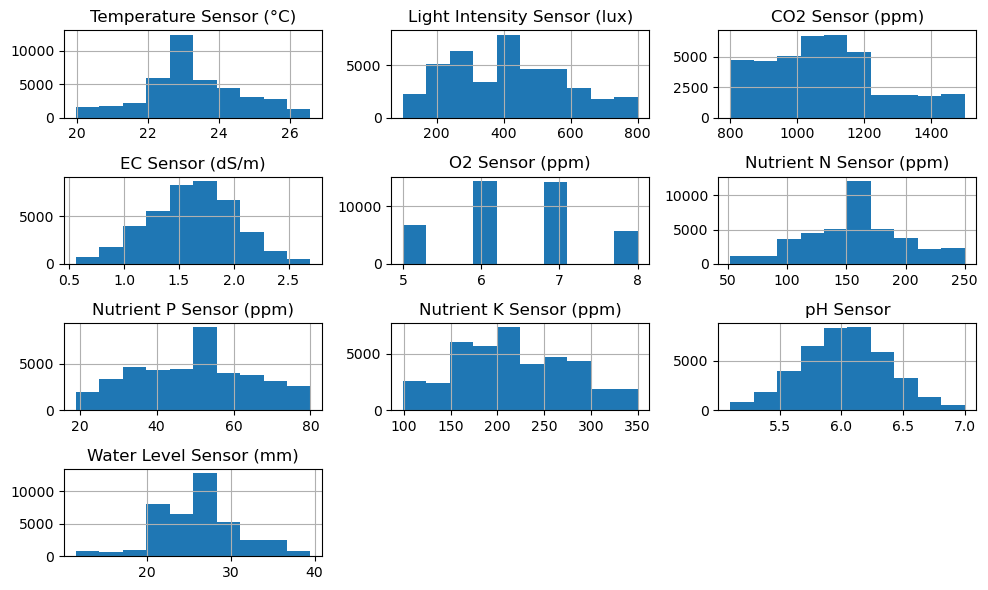

Temperature Sensor (°C)  Light Intensity Sensor (lux)  \
count                40,976.00                     40,976.00   
mean                     23.29                        412.72   
std                       1.36                        168.59   
min                      19.96                         99.00   
25%                      22.48                        270.00   
50%                      23.26                        411.00   
75%                      24.04                        535.00   
max                      26.59                        800.00   

       CO2 Sensor (ppm)  EC Sensor (dS/m)  O2 Sensor (ppm)  \
count         40,976.00         40,976.00        40,976.00   
mean           1,082.70              1.62             6.46   
std              171.03              0.39             0.92   
min              799.00              0.56             5.00   
25%              952.00              1.35             6.00   
50%            1,072.00              1.64             6.00   
75%            1,177.00              1.89             7.00   
max            1,500.00              2.70             8.00   

       Nutrient N Sensor (ppm)  Nutrient P Sensor (ppm)  \
count                40,976.00                40,976.00   
mean                    156.86                    49.47   
std                      41.28                    14.62   
min                      52.00                    19.00   
25%                     130.00                    38.00   
50%                     157.84                    49.88   
75%                     182.00                    60.00   
max                     250.00                    80.00   

       Nutrient K Sensor (ppm)  pH Sensor  Water Level Sensor (mm)  
count                40,976.00  40,976.00                40,976.00  
mean                    216.80       6.02                    25.88  
std                      59.72       0.37                     4.96  
min                      99.00       5.10                    11.50  
25%                     171.00       5.80                    22.00  
50%                     218.11       6.00                    26.00  
75%                     262.00       6.30                    29.00  
max                     350.00       7.00                    39.50

In [110]:
# Plot histograms
numerical_cols = df[df.describe().columns]
numerical_cols.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

df.describe()

## 3.1 Bivarate Analysis - Temperature vs Features

- Now the data is clean we will do a bivariate analysis for the target (Temperature) against the features variables
- the features will include both numerical and categorical attributes

### 3.1.1 Correlation Matrix

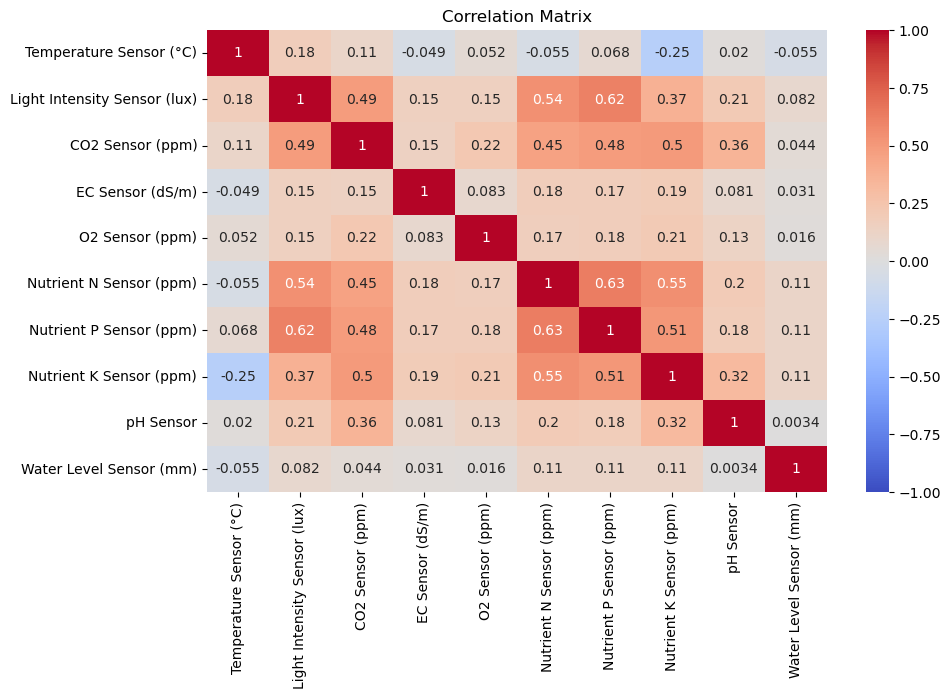

In [111]:

'''
observation:

Looking at correlation among the features (all attribute except Temperature). The Nutrient(N,P,K) seems to be fairly correlated.
One way is to drop the one of them to see if the correlation changes. Another approach is combine these 3 attributes into
one with its average value. I will do the latter. My assumption is that fertilizer mostly comes in NPK ratio so i think 
it is fine to aggregate them with average.

Looking at the correlationship between Temperature (target) and each of the features, it seems that each of the feature 
correlationship with Temperature is low, ranging from -0.24 to 24. 
'''

#create the correlation matrix
corr = df.corr()

#create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

### 3.1.2 Aggregate Nurtient N,P,K Into One Attribute with Average Value

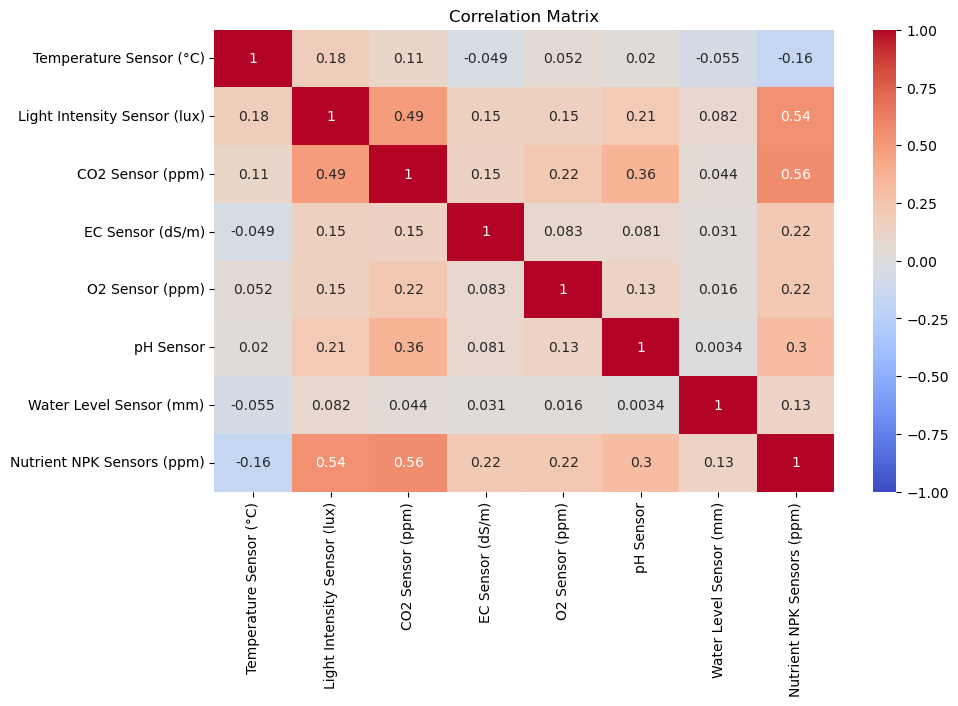

In [142]:
#Combine the 3 attributes Nurtient N,P,K into one with their average
df['Nutrient NPK Sensors (ppm)'] = df[nutrient_cols].mean(axis=1)

#to look at matrix again after data transformation
#create the correlation matrix
corr = df.drop(columns=['Nutrient N Sensor (ppm)', 'Nutrient P Sensor (ppm)', 'Nutrient K Sensor (ppm)']).corr()

#create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

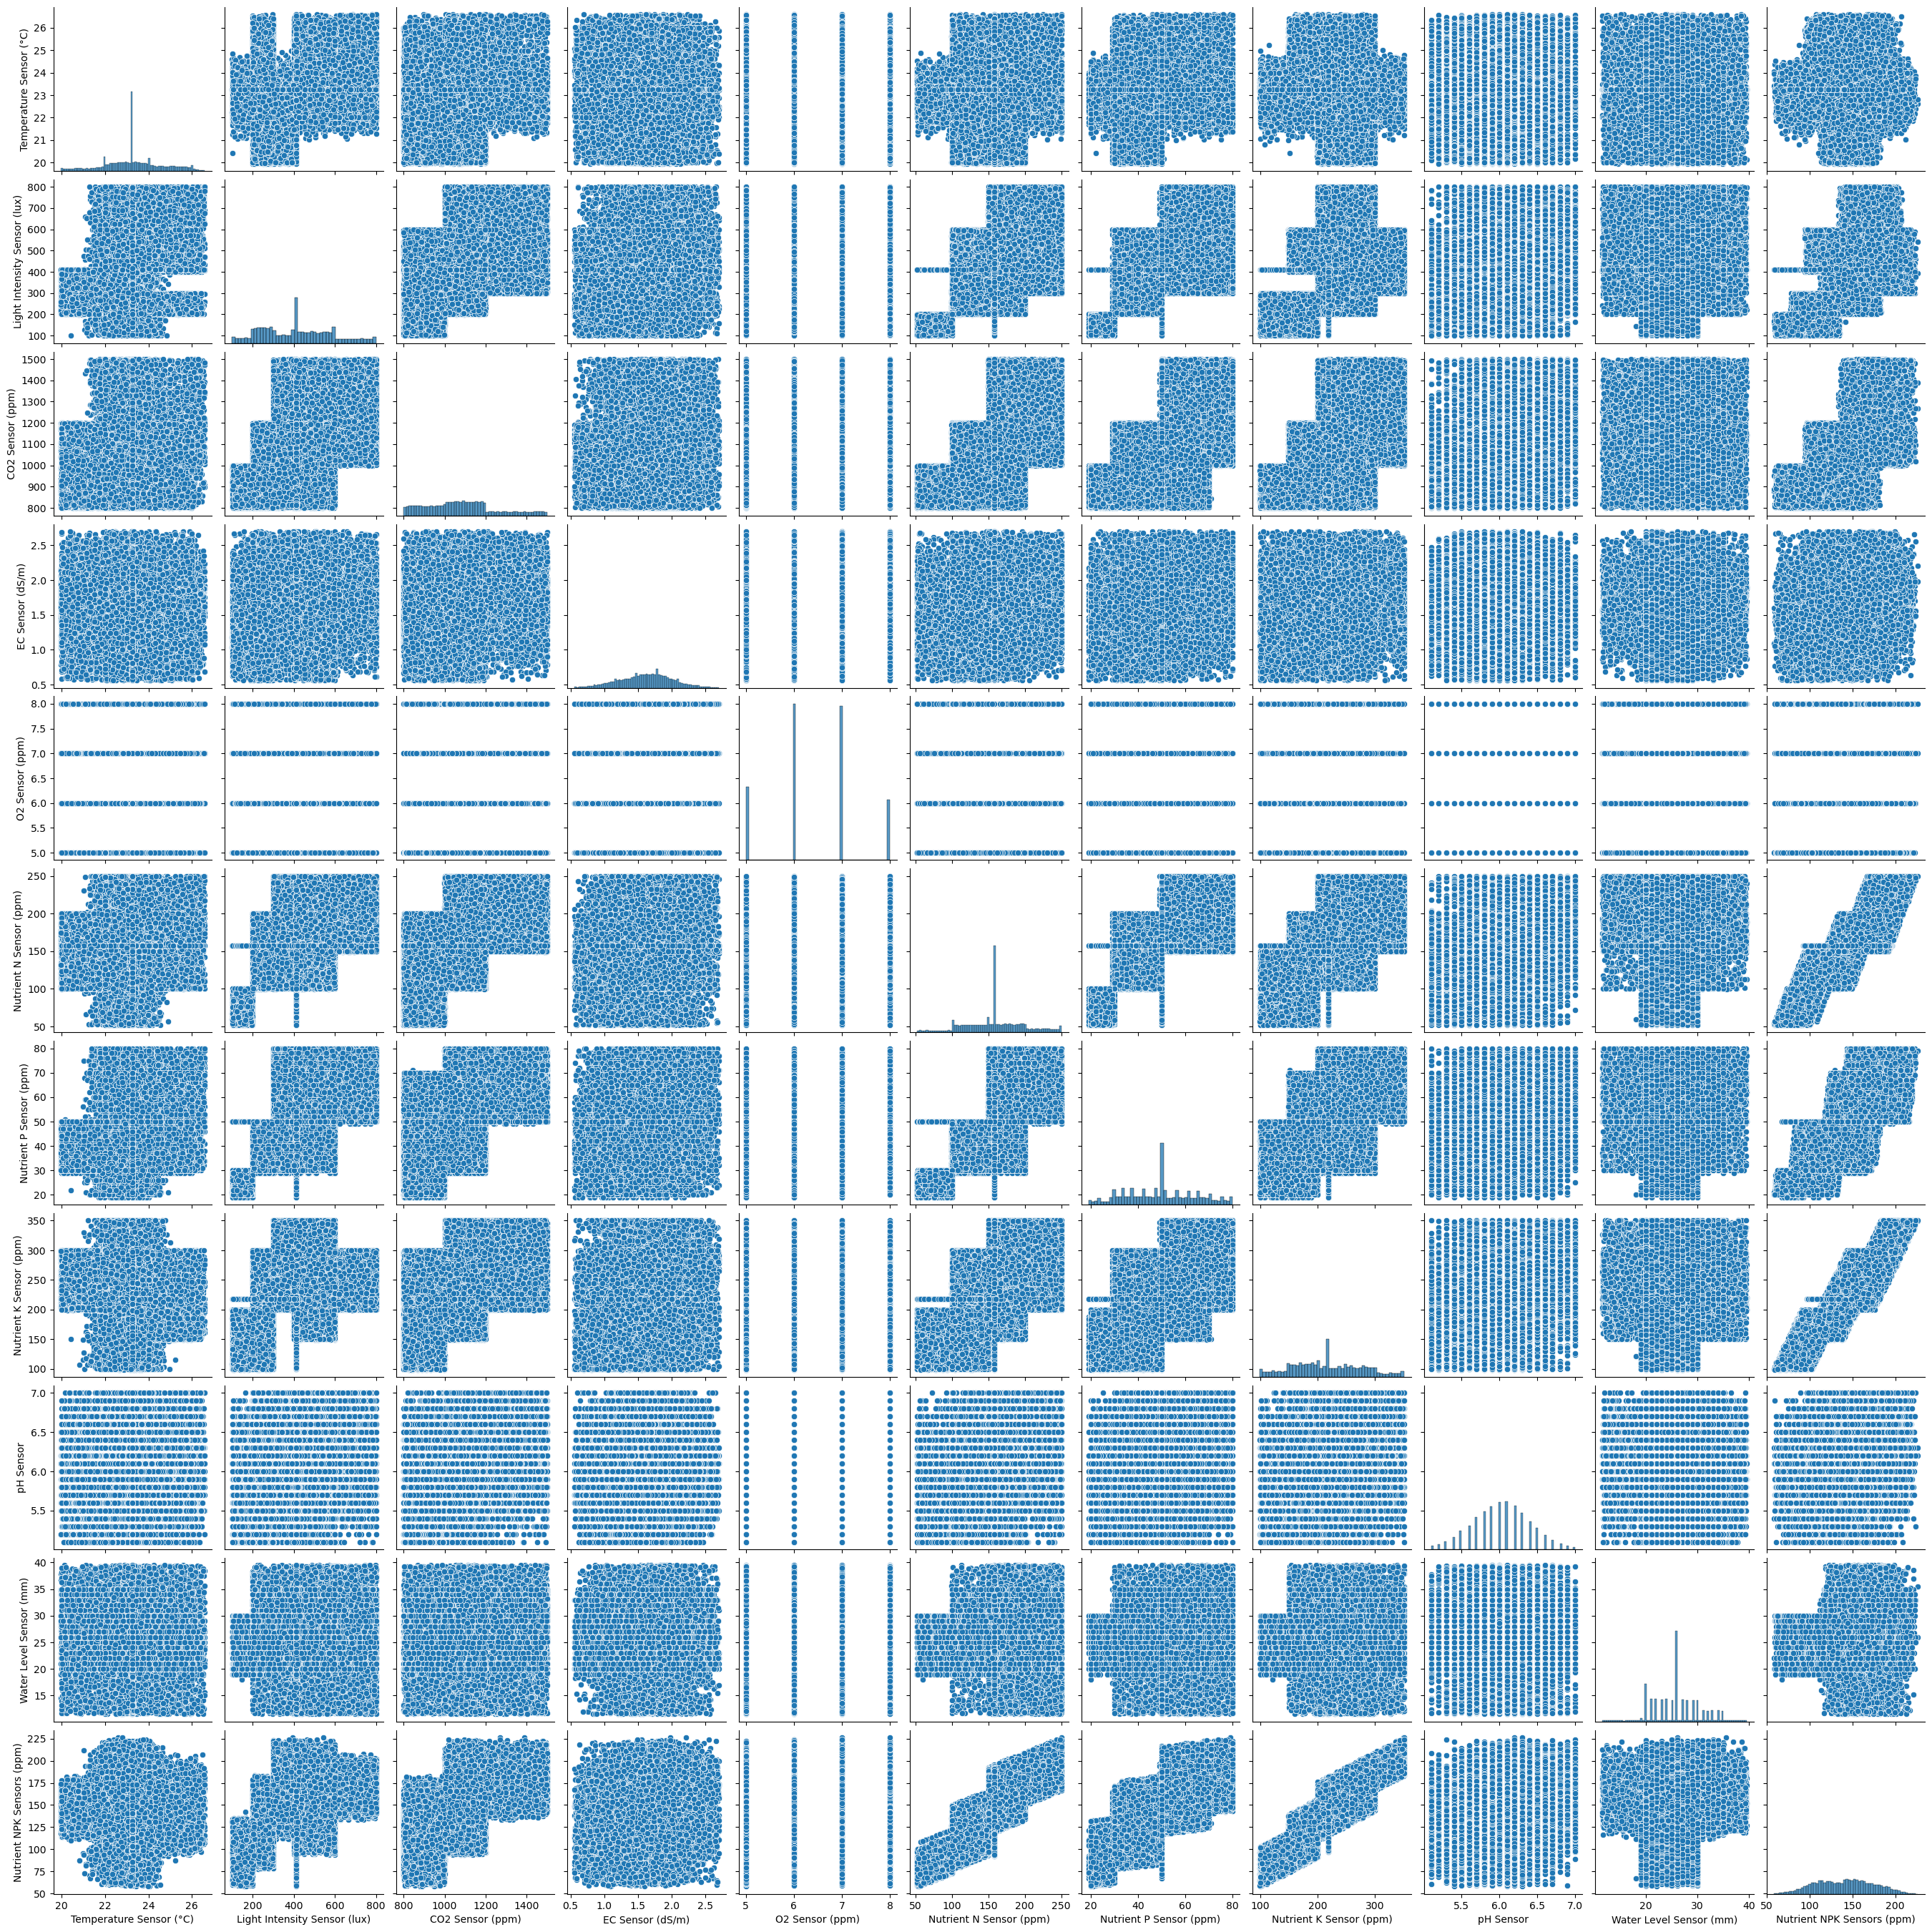

In [113]:
'''
observation:
looking at the first column of the pairplot affirms that there is no obvious linear relationship between each of the features 
and Temperature (target variable)
'''
#ploting pairplot
sns.pairplot(df)

### 3.1.3 Box Plot - Temperature Against Categorical Data

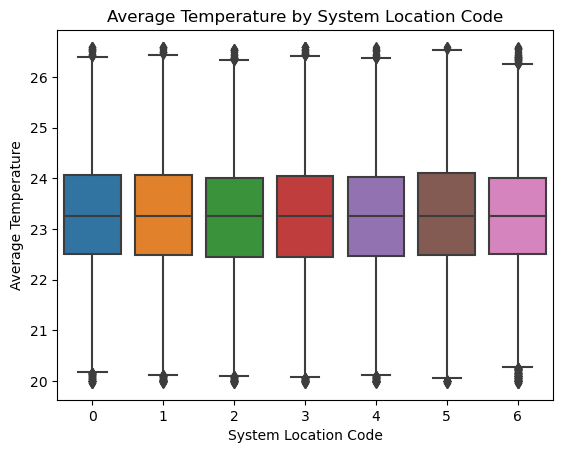

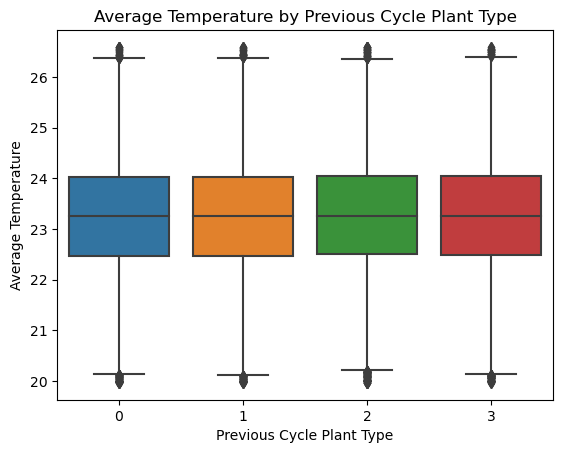

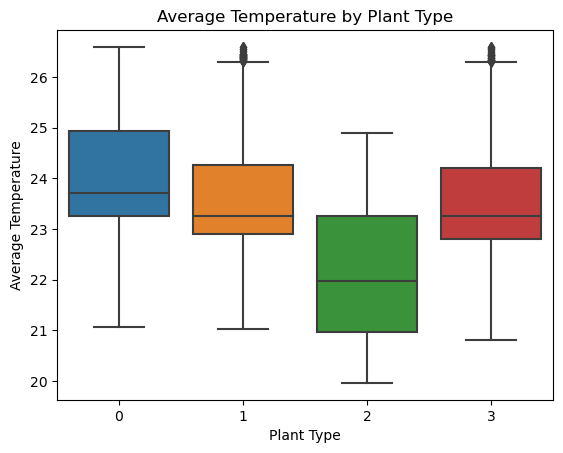

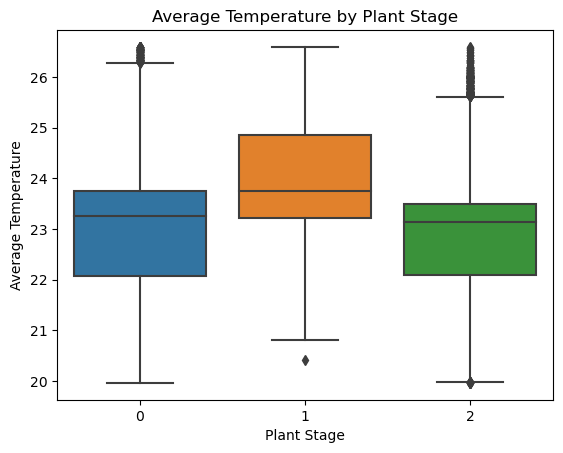

In [114]:
'''
observation:
The boxplots show average temperature against the 4 categorical attributes - Plant Type, Plant Stage, Previous Cycle Plant Type 
and System Location Code. 

This result suggest Previous Cycle Plant Type and System Location Code have no predictive power against Temperature as there 
are no variability (constant). Perform one-way ANOVA test can check if each attribute has variability.

Plant Type and Plant Stage does varies in temperatures. 
'''
#ploting 
categorical_cols = df.select_dtypes(include=['object'])

for col in categorical_cols:
# Calculate average temperature for each location
    average_temperatures = df.groupby(col)['Temperature Sensor (°C)'].apply(list)

    # Create the bar plot using Seaborn
    sns.boxplot(data=average_temperatures)
    plt.ylabel('Average Temperature')
    plt.xlabel(f'{col}')
    plt.title(f'Average Temperature by {col}')
    plt.show()

### 3.1.4 one-way ANOVA test

In [115]:
from scipy.stats import f_oneway

'''
observation:
Running a one-way ANOVA test comfirms that Temperature variability is the same across System Location Code 
and Previous Cycle Plant Type.

Based on the findings, these two attributes will be excluded for machine model training.

'''

def check_temperature_variability(col):
    '''
       Checks if the temperature variability is the same across different locations.

      Args:
        df: Pandas DataFrame with 'Temperature' and 'Location' columns.

      Returns:
        Prints a statement to indicate if the temperature variability is the same or not across the categories of the attribute.
    '''
    
    # Group the data by location
    groups = df.groupby(col)['Temperature Sensor (°C)'].apply(list)

    # Perform one-way ANOVA test
    f_statistic, p_value = f_oneway(*groups)

    # Print the results
    print(f"F-statistic: {f_statistic:.2f}")
    print(f"P-value: {p_value:.3f}")

    # Check if the p-value is greater than the significance level (e.g., 0.05)
    if p_value > 0.05:

        return print(f" : Temperature variability is the same across {col} (fail to reject H0)\n")
    else:
        return print(f"{col} : Temperature variability is NOT the same across {col} (reject H0)\n")
    
list(map(check_temperature_variability, categorical_cols))

F-statistic: 1.55
P-value: 0.157
 : Temperature variability is the same across System Location Code (fail to reject H0)

F-statistic: 1.75
P-value: 0.154
 : Temperature variability is the same across Previous Cycle Plant Type (fail to reject H0)

F-statistic: 5880.83
P-value: 0.000
Plant Type : Temperature variability is NOT the same across Plant Type (reject H0)

F-statistic: 2822.57
P-value: 0.000
Plant Stage : Temperature variability is NOT the same across Plant Stage (reject H0)



[None, None, None, None]

## 3.2 Bivarate Analysis - Plant Type-Stage vs Features
- This analysis is to look at the any relationship between target Plant Type-Stage and the features. 
- Assumption is made that only sensor data is in viewm as per assessment requirement.
- Hence all categorical attributes will be excluded from the analysis and machine learning training.

In [117]:
#Concat attributes Plant Type and Plant Stage as one
df['Plant Type-Stage'] = df['Plant Type'] + ' ' + df['Plant Stage']

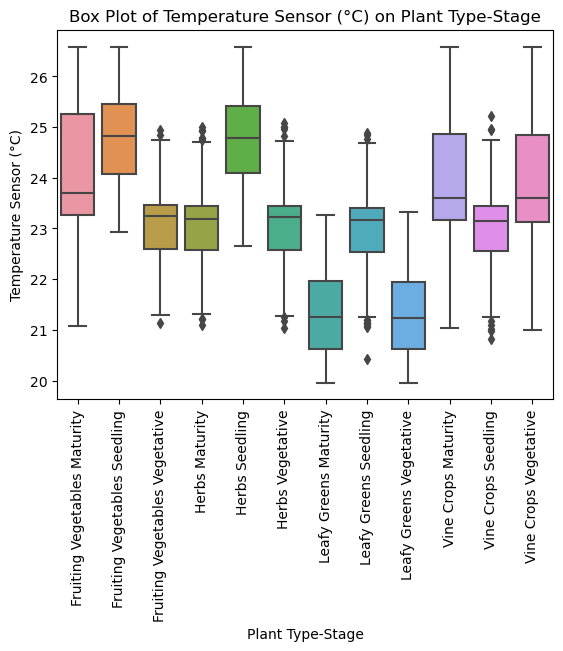

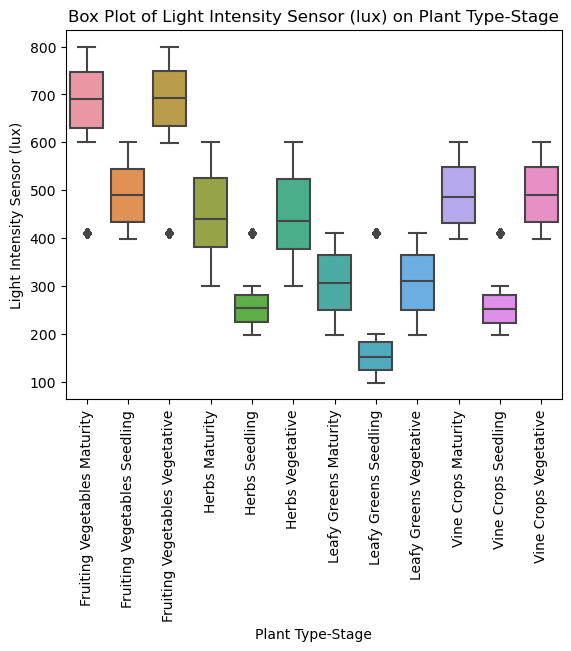

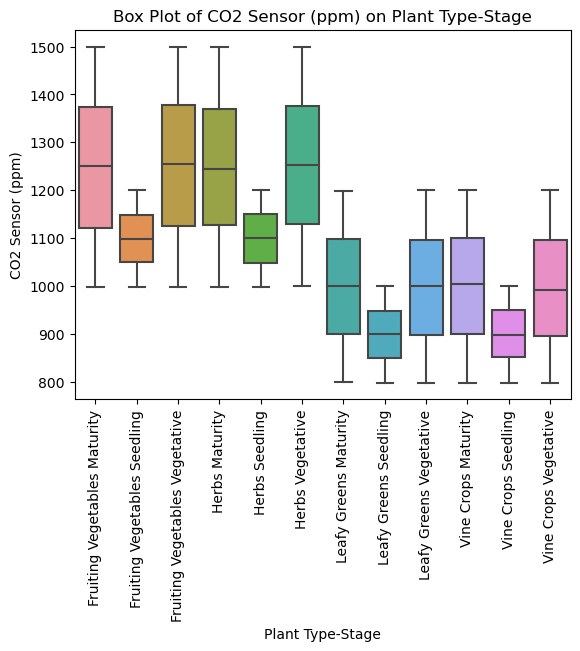

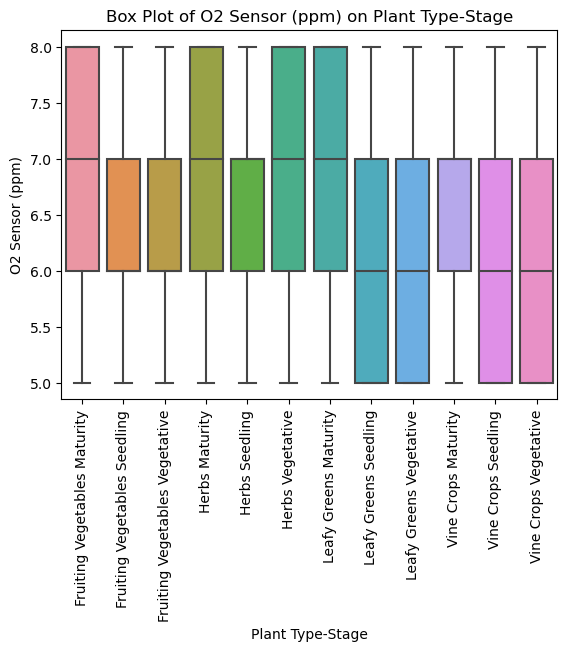

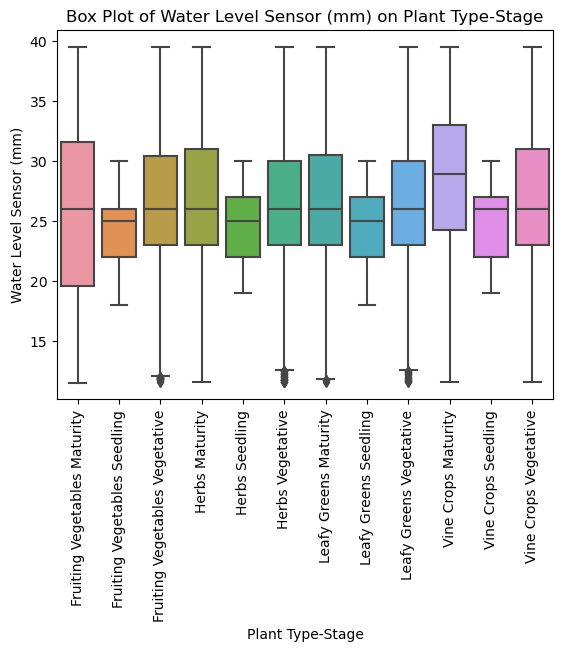

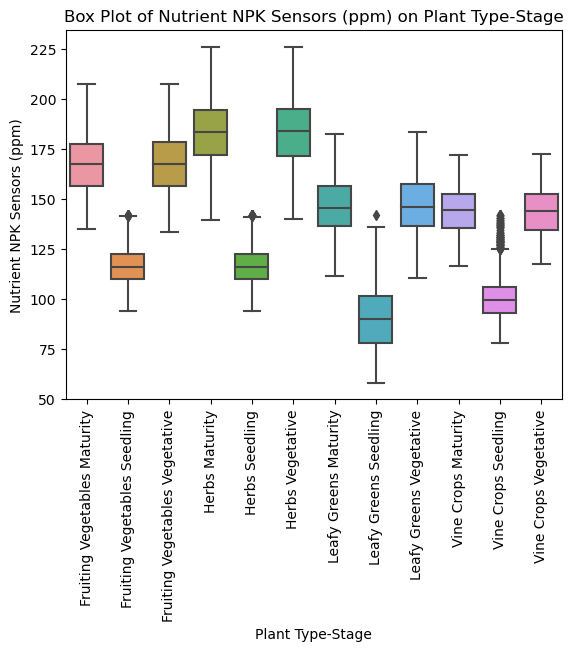

In [143]:
'''
observation:
The boxplot of sensors against Plant Type-Stage show some interesting data.
1. Plant stage seedling across plant types require lesser light, CO2 water, and nutrients than maturity and vegatative stage
2. Each plant type and its stage requires different degree of resources for growth
3. Herbs and Fruiting Vegetables generally have higher CO2 concentration than Leafy Greens and Vine Crops


Resources are better utilized if the plants grow according to its type and make use of the sensors to control the resources 
allocation based on the plant stage. It will be interesting to see how the plants are growth based on area of the farm.

'''

for col in df_plant_type.columns:

    pts = df.groupby('Plant Type-Stage')[col].apply(list)

    sns.boxplot(data=pts)
    x_ticks = plt.xticks()[0]
    
    categories = list(pts.keys())
    plt.xticks(x_ticks, categories, rotation=90)
    plt.ylabel(f'{col}')
    plt.xlabel('Plant Type-Stage')
    plt.title(f'Box Plot of {col} on Plant Type-Stage')
    plt.show()

In [140]:
'''
By grouping the plants by its location and plant type, it is observed that the plant types are grown evenly accross the 7 zones.
As mentioned, in terms of resource utilization, growing the same type of plants in a single zone is better than growing all
types of plants in a zone.
'''
df.groupby(['System Location Code','Plant Type'])['Plant Type-Stage'].count()


System Location Code  Plant Type         
Zone_A                Fruiting Vegetables    1399
                      Herbs                  1631
                      Leafy Greens           1357
                      Vine Crops             1434
Zone_B                Fruiting Vegetables    1401
                      Herbs                  1601
                      Leafy Greens           1382
                      Vine Crops             1468
Zone_C                Fruiting Vegetables    1445
                      Herbs                  1572
                      Leafy Greens           1446
                      Vine Crops             1455
Zone_D                Fruiting Vegetables    1413
                      Herbs                  1548
                      Leafy Greens           1444
                      Vine Crops             1361
Zone_E                Fruiting Vegetables    1400
                      Herbs                  1599
                      Leafy Greens           1428
        

### Summary of Bivarate Analysis

1. Previous Cycle Plant Type and System Location Code have no predictive power against Temperature as there are no variability.
   These two attributes will be excluded from the ML training to predict Temperature.
   
2. The features Nutrient(N,P,K) are correlated. These 3 attributes are combined into one with its average as value.

3. Plant stage seedling across plant types require lesser light, CO2, water, and nutrients than its maturity and vegatative
   stage.
   
4. Each plant type and its stage requires different degree of resources for growth

5. Herbs and Fruiting Vegetables generally have higher CO2 concentration than Leafy Greens and Vine Crops





## 3.3 Recommendation to Enchance ArgoTech Operational Efficiency

- Based on the data, all plant types are grown on the same location without any categorization. 
- Resources are better utilized if the plants are grown on same location according to its type. Also, make use of the sensors
  to control the resources allocation based on the plant stage will improve operational efficiency.

## 4. Feature Selection for Machine Learning

Task 2a: Predict Temperature

    Target Variable:                       'Temperature Sensor (°C)'
    Feature (Categorical) Variables (2):   'Plant Type', 'Plant Stage'
    Feature (Numerical) Variables   (7):   'Light Intensity Sensor (lux)',
                                           'CO2 Sensor (ppm)', 'EC Sensor (dS/m)', 'O2 Sensor (ppm)',
                                           'Nutrient NPK Sensor (ppm)', 'pH Sensor', 'Water Level Sensor (mm)',
                                           
Task 2b: Predict Plant Type-Stage

    Target Variable:                       'Plant Type-Stage'
    Feature (Numerical) Variables   (8):   'Light Intensity Sensor (lux)', 'Temperature Sensor (°C)
                                           'CO2 Sensor (ppm)', 'EC Sensor (dS/m)', 'O2 Sensor (ppm)',
                                           'Nutrient NPK Sensor (ppm)', 'pH Sensor', 'Water Level Sensor (mm)',

In [146]:
df.describe()

Temperature Sensor (°C)  Light Intensity Sensor (lux)  \
count                40,976.00                     40,976.00   
mean                     23.29                        412.72   
std                       1.36                        168.59   
min                      19.96                         99.00   
25%                      22.48                        270.00   
50%                      23.26                        411.00   
75%                      24.04                        535.00   
max                      26.59                        800.00   

       CO2 Sensor (ppm)  EC Sensor (dS/m)  O2 Sensor (ppm)  \
count         40,976.00         40,976.00        40,976.00   
mean           1,082.70              1.62             6.46   
std              171.03              0.39             0.92   
min              799.00              0.56             5.00   
25%              952.00              1.35             6.00   
50%            1,072.00              1.64             6.00   
75%            1,177.00              1.89             7.00   
max            1,500.00              2.70             8.00   

       Nutrient N Sensor (ppm)  Nutrient P Sensor (ppm)  \
count                40,976.00                40,976.00   
mean                    156.86                    49.47   
std                      41.28                    14.62   
min                      52.00                    19.00   
25%                     130.00                    38.00   
50%                     157.84                    49.88   
75%                     182.00                    60.00   
max                     250.00                    80.00   

       Nutrient K Sensor (ppm)  pH Sensor  Water Level Sensor (mm)  \
count                40,976.00  40,976.00                40,976.00   
mean                    216.80       6.02                    25.88   
std                      59.72       0.37                     4.96   
min                      99.00       5.10                    11.50   
25%                     171.00       5.80                    22.00   
50%                     218.11       6.00                    26.00   
75%                     262.00       6.30                    29.00   
max                     350.00       7.00                    39.50   

       Nutrient NPK Sensors (ppm)  
count                   40,976.00  
mean                       141.04  
std                         33.08  
min                         58.00  
25%                        114.96  
50%                        142.00  
75%                        165.61  
max                        226.33